In [1]:
import numpy as np
import scipy.sparse as sparse
import math
import matplotlib.pyplot as plt
from mec import make_circle
from Grid import Grid
import copy
from itertools import chain
import random
from collections import Counter

In [31]:
def in_circle(point, circle):
    x, y = point
    cx, cy, r = circle
    return np.sqrt((x - cx)**2 + (y - cy)**2) <= r

def distance(p, q):
    return np.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

def independent_gens(gens):
    ind_sets = []
    gen_sets = [set(gen) for gen in gens]

    while gen_sets:
        ind_set = [gen_sets[0]]
        gen_sets.pop(0)

        for i, gen_set in reversed(list(enumerate(gen_sets))):
            add = True
            for gen in ind_set:
                if (gen & gen_set):
                    add = False

            if add:
                ind_set.append(gen_set)
                gen_sets.pop(i)

        if (ind_set):
            ind_sets.append(ind_set)

    return ind_sets

def randomly_draw_generators(m, gamma):
    def in_circle(point, circle):
        x, y = point
        cx, cy, r = circle
        return np.sqrt((x - cx)**2 + (y - cy)**2) <= r

    gens = []
    all_points = [(x,y) for x in range(m) for y in range(m)]

    N = m**2
    L = np.sqrt(2)*((m/2)**gamma)
    while (len(gens) < N):
        cx, cy = random.choice(all_points)

        in_points = [point for point in all_points if in_circle(point, (cx, cy, L))]

        if (len(in_points) >= 5):
            points = random.sample(in_points, 5)
            gens.append(points)

    return gens

In [32]:
def configuration_model(m, gamma):
    # m = 10
    n = m**2

    r = np.sqrt(2)*((m/2)**gamma)
    deg_v = 5 # w_c. Every bit is in this many checks
    deg_c = 5 # w_r. Every check has this many bits in it
    num_checks = (n*deg_v)//deg_c
    k = n - num_checks

    vs = [deg_v for _ in range(n)]
    qbts = [(x,y) for x in range(m) for y in range(m)]
    ops = [[] for i in range(num_checks)]
    
    c_inds = []
    pot_qbts = []
    for i in range(num_checks):
        pot_qbts.append([])
        for j in range(n):
            pot_qbts[i].append(j)
        c_inds.append(i)

    while (np.count_nonzero(vs)):
        if (len(c_inds)):
            c_ind = np.random.choice(c_inds)
        else:
            break

        # choose a v that is within the specified radius (from list of potential qbts)
        v_ind = np.random.choice(pot_qbts[c_ind])
        ops[c_ind].append(qbts[v_ind])
        
        if (len(ops[c_ind]) == deg_c):
            c_inds.remove(c_ind)
        else:
            pot_qbts[c_ind].remove(v_ind)
            if (len(pot_qbts[c_ind]) == 0): c_inds.remove(c_ind)

        # update potential qbts
        # for pot_ind, pot in enumerate(pot_qbts[c_ind]):
        #     if (pot and (make_circle(ops[c_ind] + [qbts[pot_ind]])[2] > r)):
        #         pot_qbts[c_ind][pot_ind] = 0

        if (len(ops[c_ind]) == 1): 
            for i in range(n):
                if (distance(ops[c_ind][0], qbts[i]) > r):
                    if i in pot_qbts[c_ind]:
                        pot_qbts[c_ind].remove(i)
                        if (len(pot_qbts[c_ind]) == 0): c_inds.remove(c_ind)

        vs[v_ind] -= 1
        if (not vs[v_ind]):
            for i in c_inds:
                if v_ind in pot_qbts[i]:
                    pot_qbts[i].remove(v_ind)
                    if (len(pot_qbts[i]) == 0): c_inds.remove(i)


    print(sum(vs))

    # for op in ops:
    #     if (len(op) == 1):
    #         print("Do again")

    return ops

In [33]:
m = 10
gens = [randomly_draw_generators(m, gamma) for gamma in np.linspace(0,1,11)]
gammas = np.linspace(0, 1, 11)
for i, gen in enumerate(gens):
    print(np.mean([make_circle(op)[2] for op in gen]), np.sqrt(2)*(m/2)**gammas[i])

1.2255274201523572 1.4142135623730951
1.2263043770577335 1.6611620399354272
1.2400212376643729 1.9512323996468892
1.8025504011928084 2.291954538992328
1.8216761050204733 2.6921732181969564
2.333044757910777 3.1622776601683795
2.5209591726604743 3.714471242937836
2.8260918939313178 4.363088285510481
3.2841459750602873 5.124966150526038
3.5039993897598207 6.0198823230927685
3.848210393354528 7.0710678118654755


In [225]:
gens = [configuration_model(10, gamma) for gamma in np.linspace(0, 1, 11)]
gammas = np.linspace(0, 1, 11)
for i, gen in enumerate(gens):
    print(np.mean([make_circle(op)[2] for op in gen]), np.sqrt(2)*(10/2)**gammas[i])

45
65
46
31
24
12
11
10
14
4
1
1.1158948341058663 1.4142135623730951
1.0869509831517736 1.6611620399354272
1.1380979078006483 1.9512323996468892
1.680733016379129 2.291954538992328
1.7287106406142692 2.6921732181969564
2.210581402650293 3.1622776601683795
2.2876515284239516 3.714471242937836
2.7213778012439276 4.363088285510481
2.956255616543816 5.124966150526038
3.459156595374154 6.0198823230927685
3.916427275225758 7.0710678118654755


In [144]:
gammas = np.linspace(0, 1, 11)
for i, gen in enumerate(gens):
    print(np.mean([make_circle(op)[2] for op in gen]), (10/2)**gammas[i])

1.2784102085345848 1.0
1.5304246386844813 1.174618943088019
1.701426711814641 1.379729661461215
2.058036557507097 1.6206565966927626
2.422525346182174 1.9036539387158786
2.8109933020656452 2.23606797749979
3.4097317582857145 2.6265278044037674
3.87883264439834 3.0851693136000486
4.185170326454862 3.623898318388478
4.399721166926675 4.256699612603923
4.352631222994596 5.0


In [198]:
points = [(4, 6),(3, 7),(4, 7),(4, 8)]
make_circle(points)

(4.0, 7.0, 1.0)

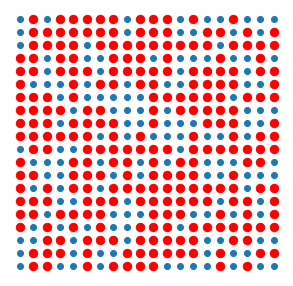

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))


ind_sets = independent_gens(ops)

all_points = [(x,y) for x in range(m) for y in range(m)]
xs, ys = zip(*all_points)
ax.scatter(xs, ys)


i = 0
ind_set = [list(s) for s in ind_sets[i]]
gen_xs, gen_ys = zip(*list(chain(*ind_set)))
ax.scatter(gen_xs, gen_ys, c='r', s=70)

ax.axis('off')
plt.show()

In [70]:
grid = Grid(m, deg_v)

for ind_set in ind_sets:
    print(grid.greedy_route_set(ind_set))

1
1
1
1
1
1
1
1
1
1
1


In [9]:
print(ind_sets[1])

[{(6, 6), (8, 8), (7, 6), (8, 6)}, {(7, 7), (8, 7), (7, 9), (9, 8), (9, 7)}, {(5, 5), (5, 4), (6, 4), (5, 3), (7, 5)}, {(4, 0), (5, 1), (3, 0), (5, 0), (4, 1)}, {(3, 7), (1, 6), (2, 7), (1, 5)}, {(5, 9), (6, 9), (4, 8), (5, 8)}, {(1, 7), (2, 6), (3, 6), (2, 5), (3, 5)}, {(1, 2), (2, 1), (3, 1), (1, 1), (1, 3)}, {(6, 2), (8, 4), (7, 3), (8, 3), (6, 3)}, {(2, 9), (0, 8), (0, 9)}, {(4, 4), (2, 4), (4, 3), (4, 2), (3, 2)}, {(7, 0), (9, 2), (8, 0)}, {(6, 7), (8, 9)}, {(0, 6)}, {(7, 1), (8, 1), (6, 1), (6, 0), (8, 2)}, {(9, 5), (9, 6), (9, 4)}]


In [38]:
grid = Grid(10, 5)

# s = [{(6, 6), (8, 8), (7, 6), (8, 6)}, {(7, 7), (8, 7), (7, 9), (9, 8), (9, 7)}, {(5, 5), (5, 4), (6, 4), (5, 3), (7, 5)}, {(4, 0), (5, 1), (3, 0), (5, 0), (4, 1)}, {(3, 7), (1, 6), (2, 7), (1, 5)}, {(5, 9), (6, 9), (4, 8), (5, 8)}, {(1, 7), (2, 6), (3, 6), (2, 5), (3, 5)}, {(1, 2), (2, 1), (3, 1), (1, 1), (1, 3)}, {(6, 2), (8, 4), (7, 3), (8, 3), (6, 3)}, {(2, 9), (0, 8), (0, 9)}, {(4, 4), (2, 4), (4, 3), (4, 2), (3, 2)}, {(7, 0), (9, 2), (8, 0)}, {(6, 7), (8, 9)}, {(0, 6)}, {(7, 1), (8, 1), (6, 1), (6, 0), (8, 2)}, {(9, 5), (9, 6), (9, 4)}]
s = [{(2, 2), (2, 4), (3, 3), (3, 4), (4, 4)}]
grid.greedy_route_set(s)

1

In [18]:
for op in s:
    grid = Grid(10,5)
    print(grid.greedy_route_set(s))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


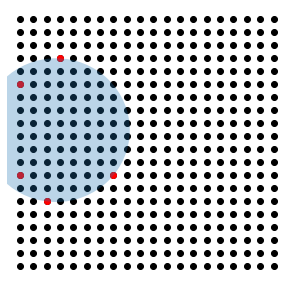

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

i = 5

# pot_qbt_inds = [qbts[j] for j in pot_qbts[i]]
xs, ys = zip(*qbts)
op_xs, op_ys = zip(*ops[i])
# pot_xs, pot_ys = zip(*pot_qbt_inds)

cir = make_circle(ops[i])
c = plt.Circle((cir[0], cir[1]), cir[2], alpha=0.3)
ax.scatter(xs, ys, c='k')
ax.scatter(op_xs, op_ys, c='r')
# ax.scatter(pot_xs, pot_ys, c='b')


ax.add_artist(c)
ax.axis('off')
plt.show()

0.23259936155752908


(array([3.92475305, 3.50067168, 3.36464558, 2.86454962, 2.72052199,
        2.2124245 , 1.86835848, 1.84035311, 1.77634083, 1.49628709,
        1.44027635, 1.25224027, 1.18822799, 1.07620649, 0.87616811,
        0.87616811, 0.78815122, 0.80415429, 0.7041351 , 0.568109  ,
        0.56010747, 0.48809365, 0.42808214, 0.31606064, 0.34006525,
        0.32806295, 0.30805911, 0.22004222, 0.27605297, 0.26805143,
        0.20403915, 0.21604145, 0.17603378, 0.1480284 , 0.12002303,
        0.12802456, 0.12002303, 0.06801305, 0.07601459, 0.07601459]),
 array([3.89013937e-05, 2.50341046e-02, 5.00293078e-02, 7.50245111e-02,
        1.00019714e-01, 1.25014917e-01, 1.50010121e-01, 1.75005324e-01,
        2.00000527e-01, 2.24995730e-01, 2.49990934e-01, 2.74986137e-01,
        2.99981340e-01, 3.24976543e-01, 3.49971746e-01, 3.74966950e-01,
        3.99962153e-01, 4.24957356e-01, 4.49952559e-01, 4.74947763e-01,
        4.99942966e-01, 5.24938169e-01, 5.49933372e-01, 5.74928575e-01,
        5.99923779e-01

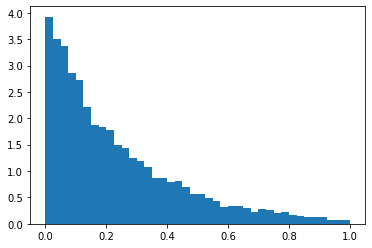

: 

In [54]:
# https://stats.stackexchange.com/questions/508749/generating-random-samples-obeying-the-exponential-distribution-with-a-given-min

a = 4
def f(x):
    return a*np.exp(-a*x)
    # return 1 - np.exp(-a*x)
def f_inv(x):
    return -(1/a)*np.log(x/a)

points = []
points_scaled = []
for i in range(10000):
    points.append(f_inv(random.uniform(0,1)))
    points_scaled.append(f_inv(random.uniform(f(0), f(1))))
    # points_scaled.append(random.uniform(0,1))

# plt.hist(points, bins=20, density=True)
print(np.mean(points_scaled))
plt.hist(points_scaled, bins=40, density=True)

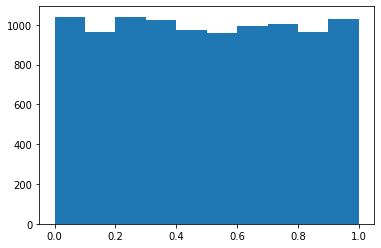

In [52]:
rd = np.round(points_scaled, 4)
res = plt.hist(rd)

In [53]:
counts = res[0]/len(points_scaled)
gammas = res[1]

s = 0
beta = 1
for c, g in zip(counts, gammas):
    s += c * (2*beta + g)   # c * (2 beta + gamma), where c is prob of getting gamma
print(s)

2.448240354


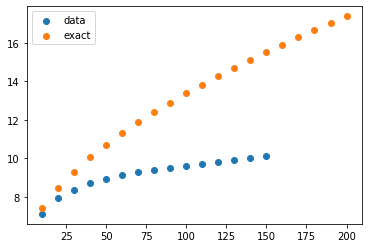

In [37]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def fit_fun(M, c, beta):
    # g(y) is the distribution function
    def g(x):
        # return 1
        l = 4
        return (l/(1-np.exp(-l))) * np.exp(-l*x)

    integrand = lambda y: g(y) * (M**y)

    return c * integrate.quad(integrand, 0, 1)[0] * M**(2*beta-2)

k = 5
beta = 0.9
type = "a_4"
df = pd.read_csv(f"../results/k_{k}/res_files_dist/{type}/combined_res.res")

tmp_df = df[(df['beta'] == round(beta, 1)) & (df['gamma'] == 0)]
plt.scatter(tmp_df['m'], tmp_df['mean'], label='data')


xs = np.linspace(10, 200, 20)
ys = [6*fit_fun(x, 1, beta) for x in xs]

plt.scatter(xs, ys, label='exact')
plt.legend()